## Assignment 5
## PHYS481 Fall 2020
## Yauheni Kalionau
## 30062335

## Simulating standing waves

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
from mpmath import mpf

## 1. Introduction

The following lab deals with the concept of standing waves that can be described in many different ways, but I find the idea that it is the result of an overlap of two waves of the same amplitude and frequency moving in opposite directions convincing enough. A specific numerical algorithm was applied to find the solution that is described by Dr. Brian in lab outlines. It will be shown that the resulting wave is extremely sensitive to the Courant number, C. The numerical results were also compared to the analytical and they were found to coincide quite perfectly.

In [22]:
# Initial condition that gives rise to the standing wave:
# u(x,0) = Asin(pimx/L)
# Exact solution: u(x,t) = Asin(pimx/L)cos(pimct/L)
# -------------------------------------------------------
# amplitude, m constant, L, speed of wave propagation:
A = 1
m = 1
c = 0.91666 #determined via multiple trial and error attempts
L = 5

# x and t inputs:
size = 999
t = np.linspace(0.0, 3.0, size) #number of time steps (-2)
x = np.linspace(0.0, L, size)


In [23]:
# Function to calculate the solution to the wave equation:
def wavesolver(x,t,A,m,c,L):

    '''
    Function calculates
    values of u(x,t) for each
    (x,t)-pair.
    '''


    dt = t[1] - t[0]
    dx = x[1] - x[0] 
    C = c * dt / dx
    C = 0.55              #use this courant number - it was realy hard to determine adequate C.
    
    u_init = []                                                                                    
    #Taking care of the u(x,0) values:                                         
    for i in range(len(x)):
        uinit = A*np.sin(np.pi*m*x[i]/L)
        u_init.append(uinit)
    
    

    #Taking care of the initial step (t = 0):
    uinitstep = u_init.copy()
    uinitstep[0] = 0
    uinitstep[-1] = 0
    for i in range(1,len(x)-2):
        uinitstep[i] = u_init[i] - (1/2)*(C**2)*(u_init[i+1] - 2*u_init[i] + u_init[i-1]) 
        

    #umain stores arrays with values for each (x,t) pair (2D array):
    umain = [uinitstep.copy() for i in range(len(t))]
    umain[0] = u_init
    u = uinitstep.copy()

    #Initiating u(x,t) list for t values one step behind (n-1):
    utimeprev = u_init.copy()

    #Dealing with u(x,t) for each time step:
    for time in range(1,len(t)-1):

        #Copying arrays to keep dimensions
        #(values of u(x,t) for each time step):
        utimestep = np.empty(len(u))
        
        
        #Calculating u(x,t) for specific 'time = t':
        for i in range(1,len(x)-2):
            utimestep[i] = -utimeprev[i] + 2*u[i] + (C**2)*(u[i+1] - 2*u[i] + u[i-1])
        
        #Taking care of boundary values:
        utimestep[0] = 0
        utimestep[len(x)-1] = 0

        #Updating 'timestep(s)', i.e. lists with all u(x,t) for specific t ->
        # -> moving them one time step forward:    
        umain[time] = utimestep
        utimeprev = u  #(n-1) generation
        u = utimestep  #
        
    return umain 

u = wavesolver(x,t,A,m,c,L)

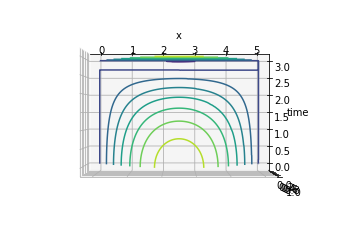

In [24]:
#Perspective number one:
X, T = np.meshgrid(x, t)
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.ylabel("time")
plt.xlabel("x")
ax.contour3D(X,T,u)
ax.view_init(elev=90, azim=270)
#-----------------------------

    

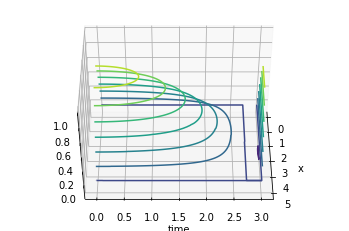

In [25]:
#Perspective number two:
X, T = np.meshgrid(x, t)
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.ylabel("time")
plt.xlabel("x")
ax.contour3D(X,T,u)
ax.view_init(elev=45, azim=0)

Also need to detemine the error in the simulation by comparing the results to the analytical solution.

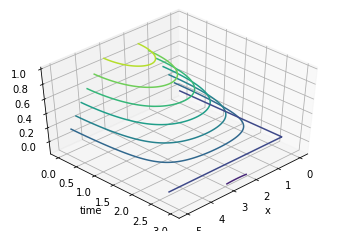

In [26]:
#Analytic solution to the problem:
u_analytic = np.ndarray((len(t),len(x)))
for i in range(len(t)):
    for j in range(len(x)):
        u_analytic[i][j] = A*np.sin(np.pi*m*x[j]/L)*np.cos(np.pi*m*c*t[i]/L)

#Plotting analytical solution:
X, T = np.meshgrid(x, t)
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.ylabel("time")
plt.xlabel("x")
ax.contour3D(X,T,u_analytic)
ax.view_init(elev=45, azim=45)

As can be notes the analytical solution resembles the numerical quite well.

In [27]:
#Calculating percent error:
size = 999
t = np.linspace(0.0, 3.0, size) 
x = np.linspace(0.0, L, size)
u = wavesolver(x,t,A,m,c,L)
percerr = np.ndarray((len(t),len(x)))              #copying just to keep the size = u(x,t) array.
for i in range(len(t)-1):
    for j in range(len(x)-1):
        percerr[i][j] = 100*(u[i][j] - u_analytic[i][j])/u_analytic[i][j]
    

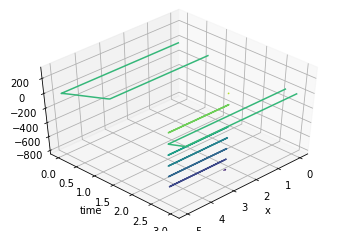

In [28]:
#Plotting percent error as a function of time and position:
X, T = np.meshgrid(x, t)
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.ylabel("time")
plt.xlabel("x")
ax.contour3D(X,T,percerr)
ax.view_init(elev=45, azim=45)

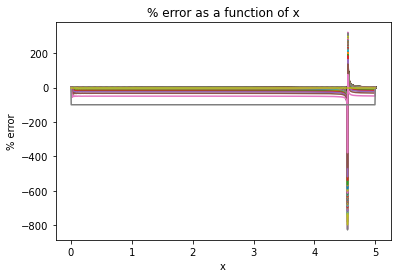

In [29]:
plt.plot(x,percerr)
plt.xlabel("x")
plt.ylabel("% error")
plt.title("% error as a function of x")
plt.show()

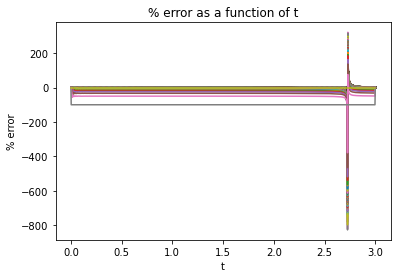

In [30]:
plt.plot(t,percerr)
plt.xlabel("t")
plt.ylabel("% error")
plt.title("% error as a function of t")
plt.show()

I think the scale of % error axis is offset by at least 1e2 degree because visually the numerical solution is very much like the analytical solution, but the percent error shows that the deviation could be about 800 percent what is not true. However, we can clearly see a hyperbolic relation what perhaps indicates that there is a pattern in the data, and that could be correct. Unfortunately, I did not find any legitimate scientific papers on this topic so I can't make a conclusion if such behaviour was expected or not.

In [37]:
    #Calculating speed of wave propagation for C=0.55:
    dt = t[1] - t[0]
    dx = x[1] - x[0]
    print("Speed of wave propagation is c=", 0.55*dx/dt)

Speed of wave propagation is c= 0.9166666666666667


## Discussion:
The numerical method itself is quite easy to apply despite the presence of complicated and probably not always clear statements in my code. However, the results are extremely sensitive to Courant number C and it took me a lot of time to determine which range of values will work better. Also, I have decided to manually set up C-number, because I figured out that it will be much harder to create such an "x" and "t" arrays that will produce adequate C values when the C = c(dt/dx) formula is applied. For example, for C = 0.8 we can see standing waves, but for C = 0.99999 or 1.00001 we get extreme levels of perturbations that do not resemble standing waves even remotely. So I would say that the choice of Courant number is perhaps the number one factor responsible for the validity of results. By trial and error and by backtesting more than 200 Courant Number values I found out that C = 0.55 produces the most appealing waveforms. Also, beware that the default sample size (denoted as just 'size' in the code), which is 999, is quite large and takes a few seconds to calculate - so be patient. Also, I have noticed that occasionally my laptop pulls up some random data that messes up plots completely. So, in case if instead of 1D standing waves you see just some noise - try closing VisualStudio or whatever you're using, and restart Python Kernel. This happened to me many times while I was working on the code.